In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

In [2]:
# path = 'C:\\Users\\ASUS\\Desktop\\423ProjectPart2\\data'
path = 'C:\\Users\\EylülRanaSaraç\\OneDrive - boun.edu.tr\\Masaüstü\\IE 423\\Project Part 2\\golden-girlz\\ProjectPart2\\20180101_20231121_bist30'

all_files = glob.glob(path + "/*_bist30.csv")
 
specified_files = [
    "20180101_20180401_bist30.csv", "20180402_20180701_bist30.csv",
    "20180702_20180930_bist30.csv", "20181001_20181230_bist30.csv",
    "20181231_20190331_bist30.csv", "20190401_20190630_bist30.csv",
    "20190701_20190929_bist30.csv", "20190930_20191229_bist30.csv",
    "20191230_20200329_bist30.csv", "20200330_20200628_bist30.csv",
    "20200629_20200927_bist30.csv", "20200928_20201227_bist30.csv"
]

files_2018_to_2021 = [file for file in all_files if any(spec_file in file for spec_file in specified_files)]

df_list = []

# Loop through the files and read them into individual dataframes
for filename in files_2018_to_2021:
    df = pd.read_csv(filename, parse_dates=['timestamp'])
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)
df = df.sort_values(by="timestamp")

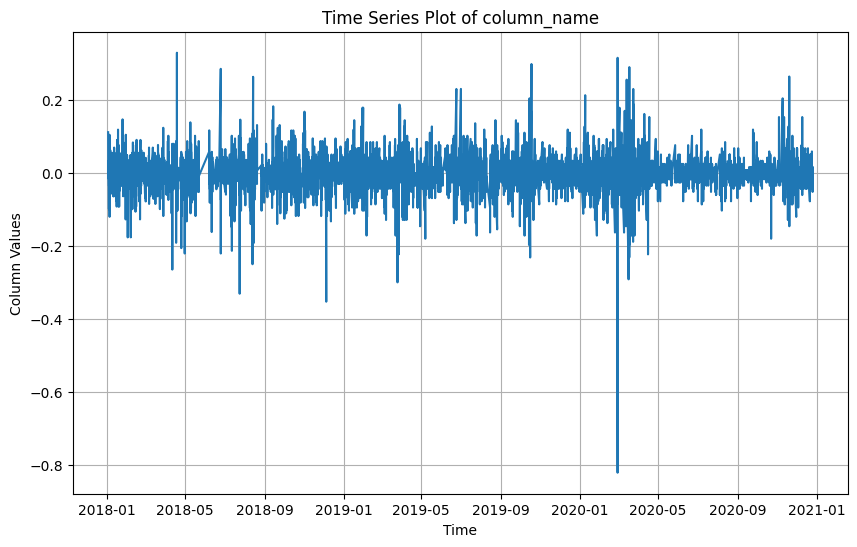

In [3]:
stock_names = df['short_name'].unique()
all_df = pd.DataFrame()
for stock in stock_names:
    stock_data = df.loc[df["short_name"] == stock].iloc[:,[0,1]]
    all_df[stock] = stock_data["price"]

all_df = all_df.diff().dropna()

plt.figure(figsize=(10, 6))
plt.plot(all_df['AKBNK'])
plt.title('Time Series Plot of column_name')
plt.xlabel('Time')
plt.ylabel('Column Values')
plt.grid(True)
plt.show()

<Axes: >

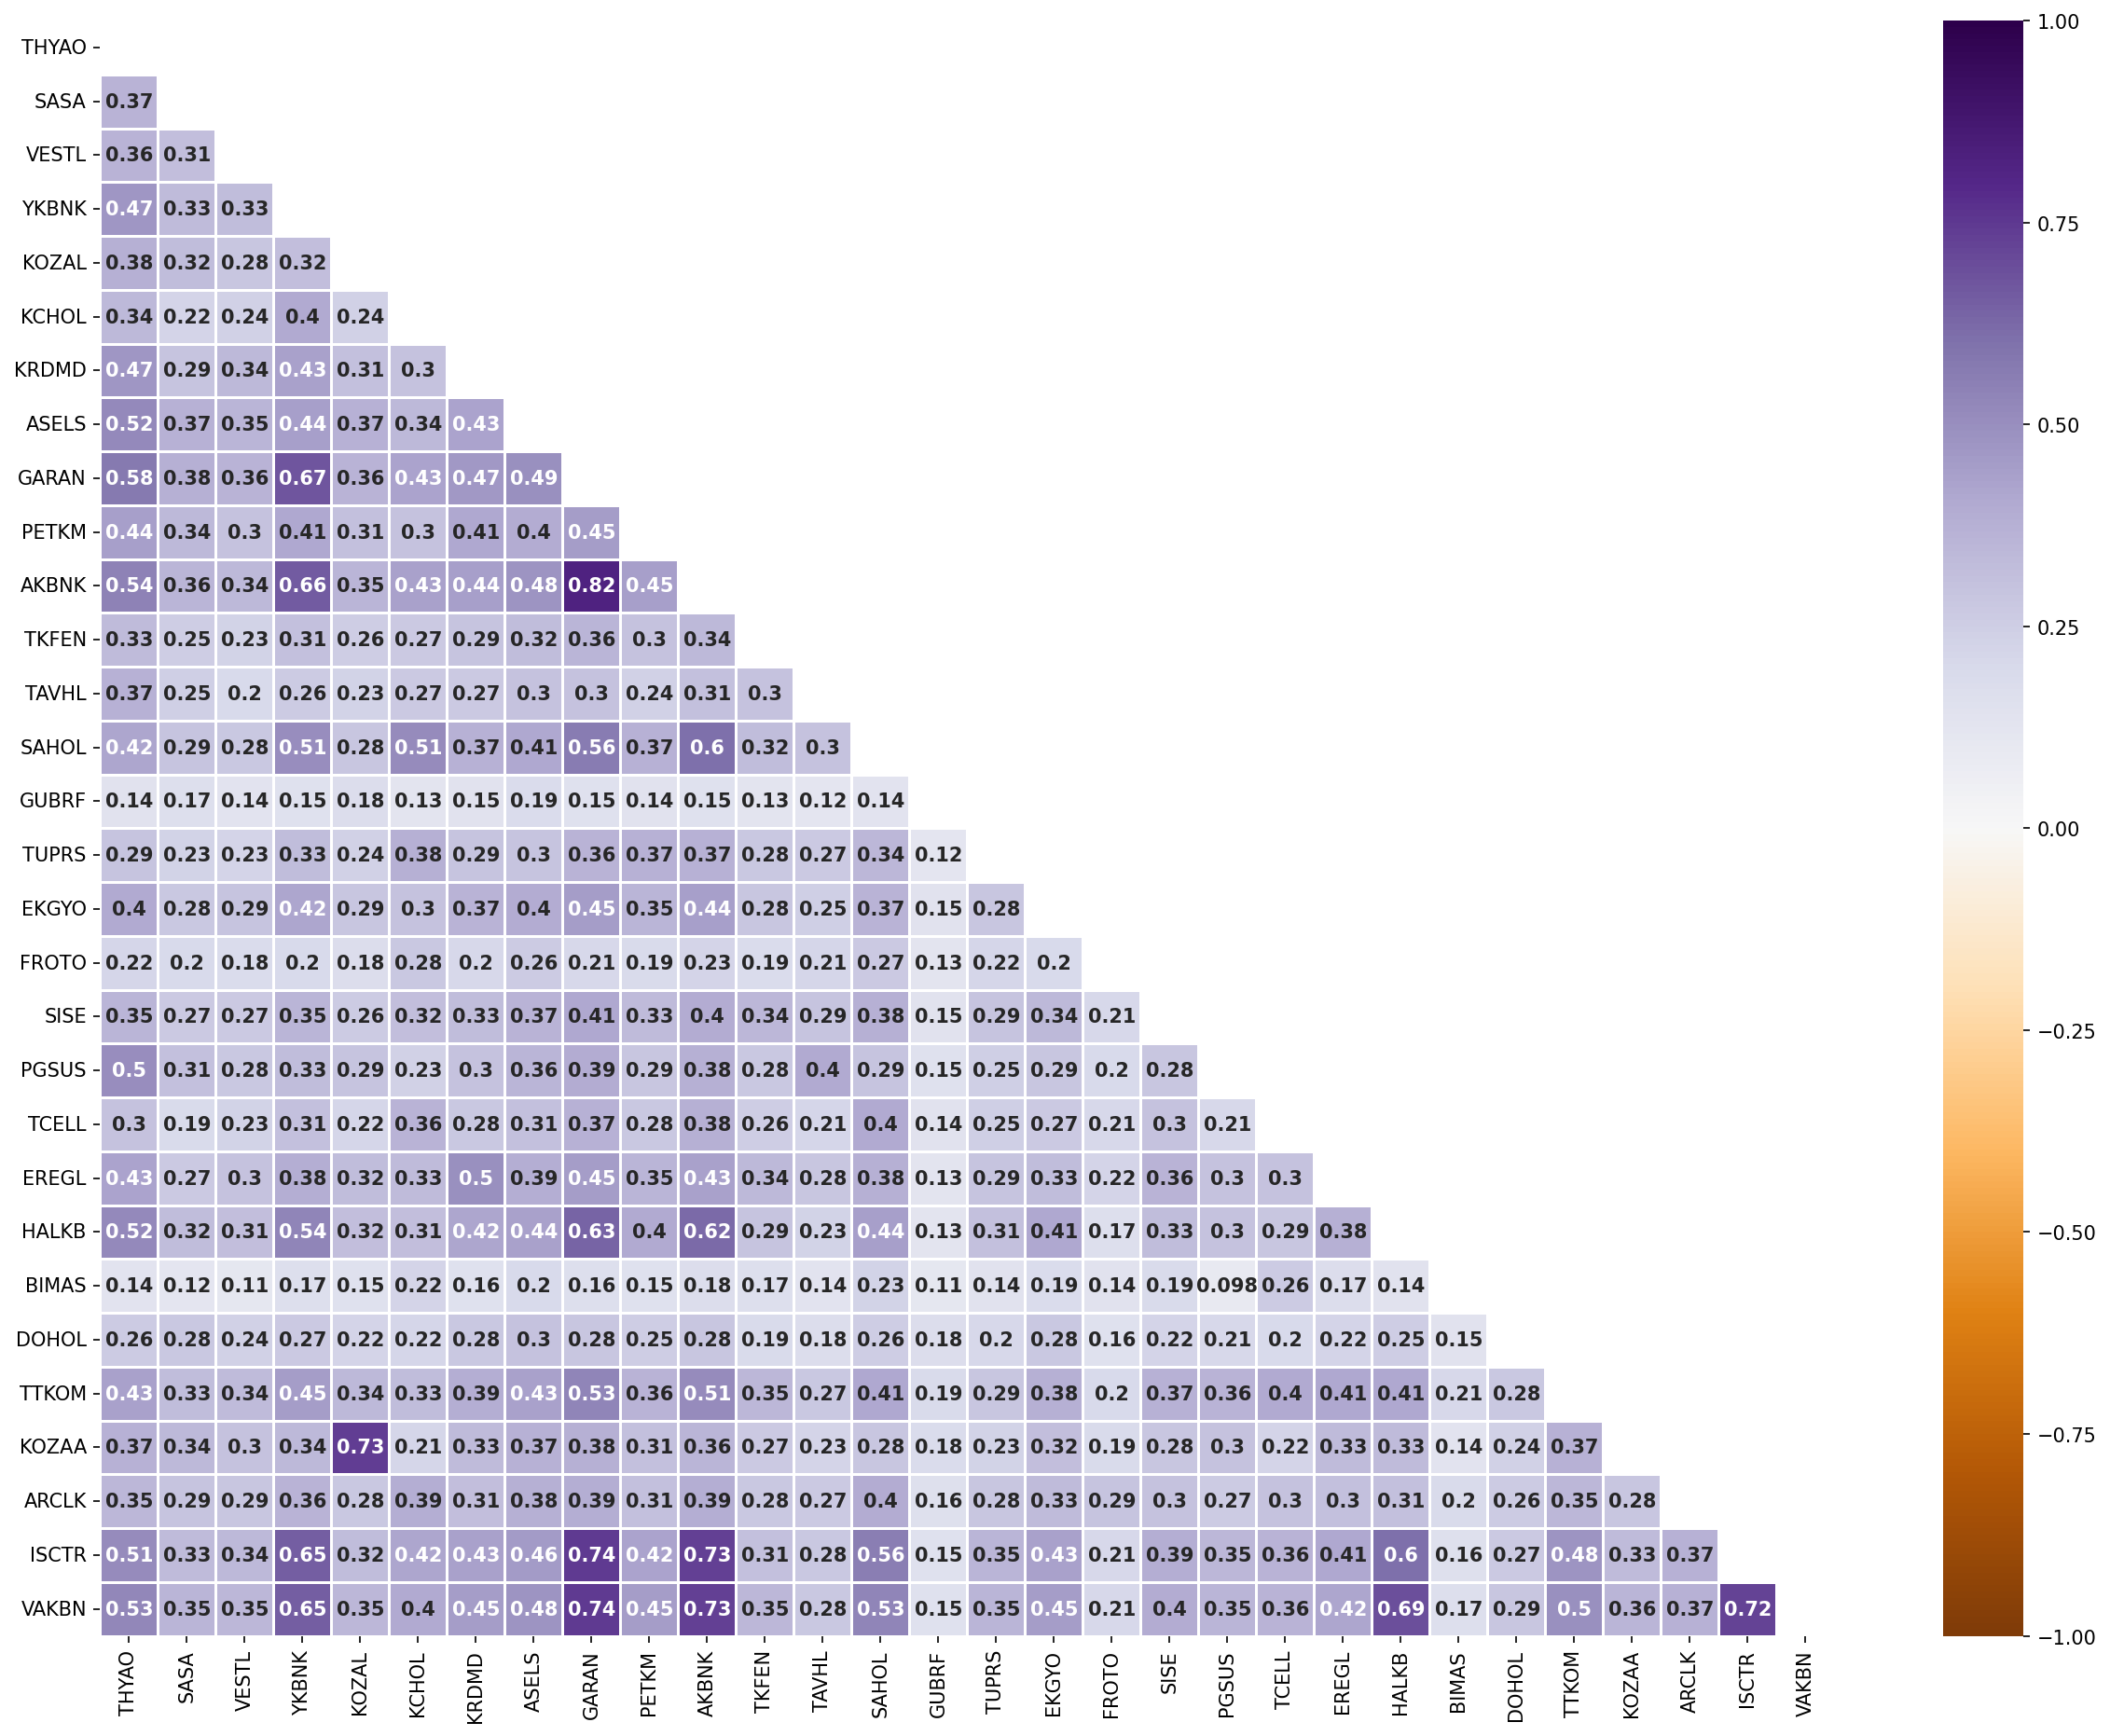

In [4]:
stock_names = df['short_name'].unique()
all_df = pd.DataFrame()
for stock in stock_names:
    stock_data = df.loc[df["short_name"] == stock].iloc[:,[0,1]]
    all_df[stock] = stock_data["price"]
    
all_df = all_df.interpolate().diff().dropna()
corr = all_df.corr()
matrix = np.triu(corr)
plt.figure(figsize=(20,15), dpi=150) 
sns.heatmap(corr,mask = matrix, vmin = -1, vmax = 1, linewidth = 0.5,cmap ="PuOr",annot = True,annot_kws ={'fontweight':'bold'})

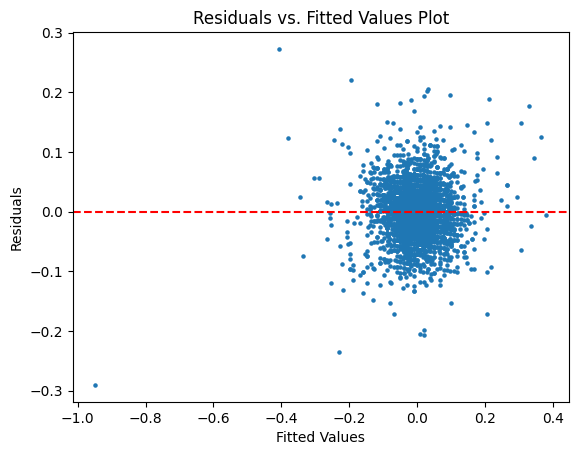

In [5]:
X = all_df["AKBNK"].values.reshape(-1,1)
Y = all_df["GARAN"].values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X,Y)
Y_predictions = lr.predict(X)
residuals = Y - Y_predictions
mean = residuals.mean()
std = residuals.std()

plt.scatter(Y_predictions, residuals, s=5)
plt.axhline(y=0, color='r', linestyle='--')  
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.show()

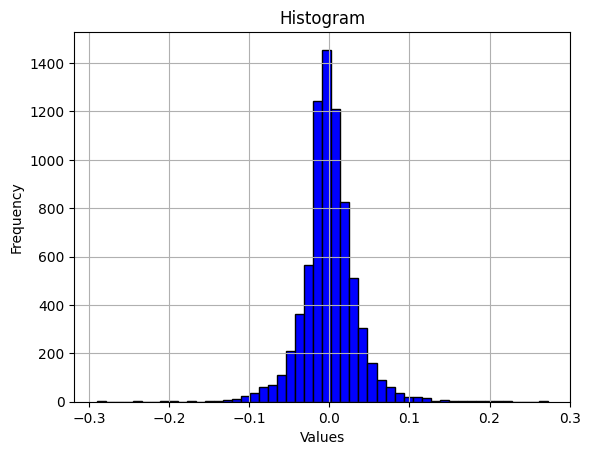

In [6]:
plt.hist(residuals, bins=50, color='blue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Text(0, 0.5, 'residuals')

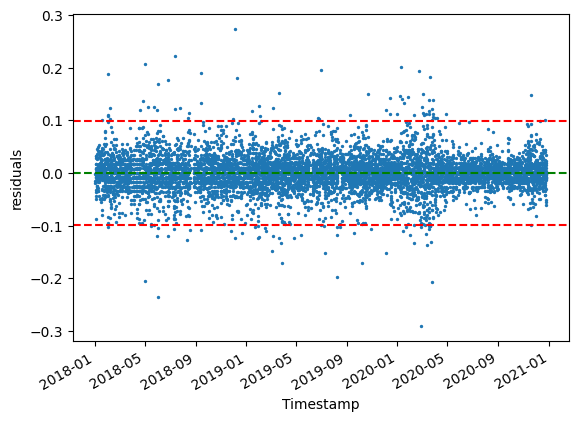

In [7]:
LCL = mean - 3*std
UCL = mean + 3*std
plt.scatter(all_df.index,residuals,marker="o",s=2)
plt.gcf().autofmt_xdate()
plt.axhline(y = mean, color = 'g', linestyle = '--')
plt.axhline(y = UCL, color = 'r', linestyle = '--')#
plt.axhline(y = LCL, color = 'r', linestyle = '--')
plt.xlabel("Timestamp")
plt.ylabel("residuals")

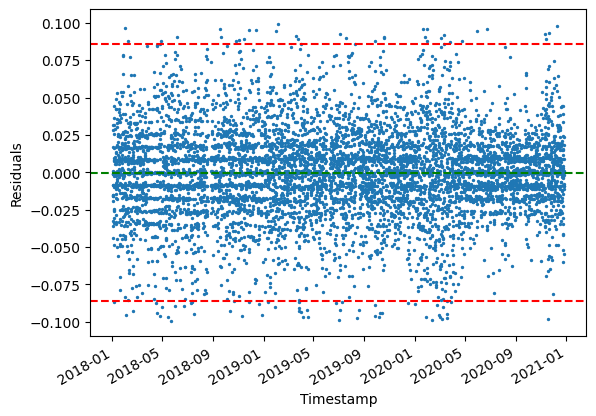

In [8]:
remaining_residuals = residuals[(residuals >= LCL) & (residuals <= UCL)]
remaining_timestamps = all_df[(residuals >= LCL) & (residuals <= UCL)].index

new_mean = np.mean(remaining_residuals)
new_std = np.std(remaining_residuals)
new_CL = new_mean
new_UCL = new_mean + 3*new_std
new_LCL = new_mean - 3*new_std
plt.scatter(remaining_timestamps, remaining_residuals, marker="o", s=2)
plt.axhline(new_CL, color='g', linestyle='--')
plt.axhline(new_UCL, color='r', linestyle='--')
plt.axhline(new_LCL, color='r', linestyle='--')
plt.gcf().autofmt_xdate()
plt.xlabel("Timestamp")
plt.ylabel("Residuals")

plt.show()

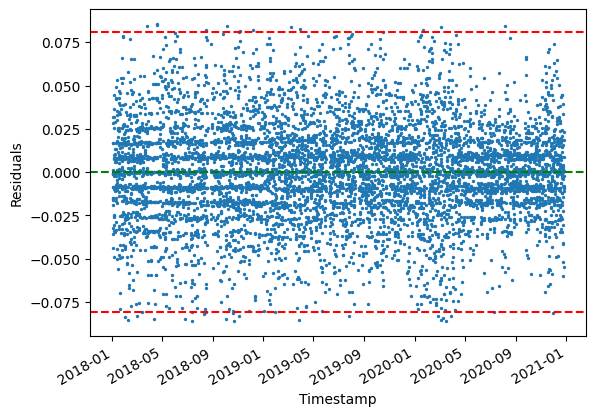

In [9]:
remaining_residuals_2 = remaining_residuals[(remaining_residuals >= new_LCL) & (remaining_residuals <= new_UCL)]
remaining_timestamps_2 = remaining_timestamps[(remaining_residuals >= new_LCL) & (remaining_residuals <= new_UCL)]

new_mean_2 = np.mean(remaining_residuals_2)
new_std_2 = np.std(remaining_residuals_2)
new_CL_2 = new_mean_2
new_UCL_2 = new_mean_2 + 3*new_std_2
new_LCL_2 = new_mean_2 - 3*new_std_2
plt.scatter(remaining_timestamps_2, remaining_residuals_2, marker="o", s=2)
plt.axhline(new_CL_2, color='g', linestyle='--')
plt.axhline(new_UCL_2, color='r', linestyle='--')
plt.axhline(new_LCL_2, color='r', linestyle='--')
plt.gcf().autofmt_xdate()
plt.xlabel("Timestamp")
plt.ylabel("Residuals")

plt.show()

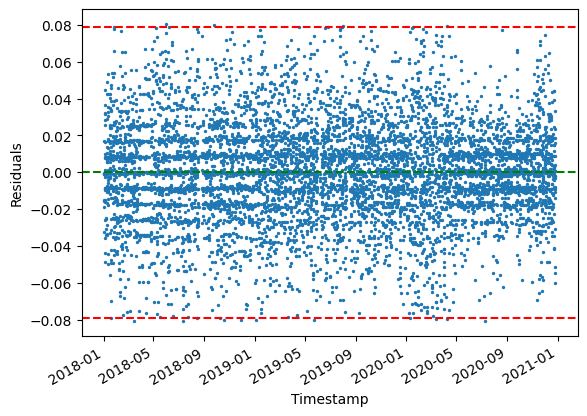

In [10]:
remaining_residuals_3 = remaining_residuals_2[(remaining_residuals_2 >= new_LCL_2) & (remaining_residuals_2 <= new_UCL_2)]
remaining_timestamps_3 = remaining_timestamps_2[(remaining_residuals_2 >= new_LCL_2) & (remaining_residuals_2 <= new_UCL_2)]

new_mean_3 = np.mean(remaining_residuals_3)
new_std_3 = np.std(remaining_residuals_3)
new_CL_3 = new_mean_3
new_UCL_3 = new_mean_3 + 3*new_std_3
new_LCL_3 = new_mean_3 - 3*new_std_3
plt.scatter(remaining_timestamps_3, remaining_residuals_3, marker="o", s=2)
plt.axhline(new_CL_3, color='g', linestyle='--')
plt.axhline(new_UCL_3, color='r', linestyle='--')
plt.axhline(new_LCL_3, color='r', linestyle='--')
plt.gcf().autofmt_xdate()
plt.xlabel("Timestamp")
plt.ylabel("Residuals")

plt.show()

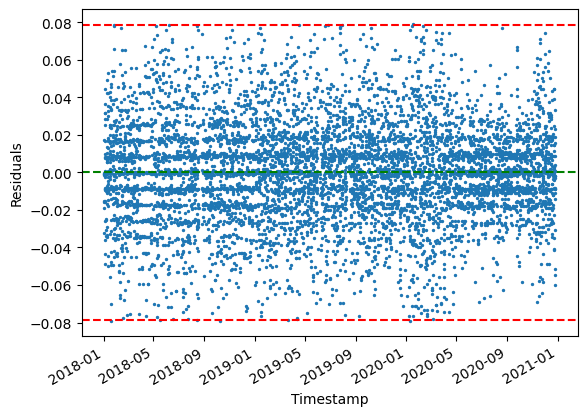

In [11]:
remaining_residuals_4 = remaining_residuals_3[(remaining_residuals_3 >= new_LCL_3) & (remaining_residuals_3 <= new_UCL_3)]
remaining_timestamps_4 = remaining_timestamps_3[(remaining_residuals_3 >= new_LCL_3) & (remaining_residuals_3 <= new_UCL_3)]

new_mean_4 = np.mean(remaining_residuals_4)
new_std_4 = np.std(remaining_residuals_4)
new_CL_4 = new_mean_4
new_UCL_4 = new_mean_4 + 3*new_std_4
new_LCL_4 = new_mean_4 - 3*new_std_4
plt.scatter(remaining_timestamps_4, remaining_residuals_4, marker="o", s=2)
plt.axhline(new_CL_4, color='g', linestyle='--')
plt.axhline(new_UCL_4, color='r', linestyle='--')
plt.axhline(new_LCL_4, color='r', linestyle='--')
plt.gcf().autofmt_xdate()
plt.xlabel("Timestamp")
plt.ylabel("Residuals")

plt.show()

Text(0, 0.5, 'residuals')

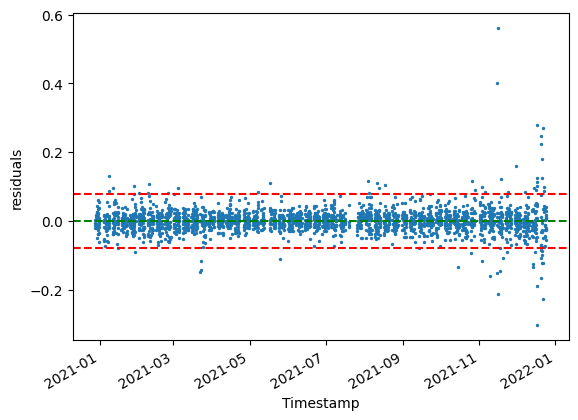

In [12]:
CL =new_CL_4
UCL = new_UCL_4
LCL = new_LCL_4
 
specified_files_2021 =  ["20201228_20210328_bist30.csv","20210329_20210627_bist30.csv","20210628_20210926_bist30.csv","20210927_20211226_bist30.csv"]

files_2021 = [file for file in all_files if any(spec_file_2021 in file for spec_file_2021 in specified_files_2021)]

# Loop through the files and read them into individual dataframes
for filename in files_2021:
    df = pd.read_csv(filename, parse_dates=['timestamp'])
    df_list.append(df)
    
df_2021_list = []

for file in files_2021:
    df = pd.read_csv(file)
    df_2021_list.append(df)

df_2021 = pd.concat(df_2021_list, ignore_index=True)
df_2021["timestamp"] = pd.to_datetime(df_2021["timestamp"])
df_2021.set_index("timestamp", inplace=True)
df_2021 = df_2021.sort_values(by="timestamp")

stock_names = df_2021['short_name'].unique()
all_df_2021 = pd.DataFrame()
for stock in stock_names:
    stock_data = df_2021.loc[df_2021["short_name"] == stock].iloc[:,[0,1]]
    all_df_2021[stock] = stock_data["price"]

all_df_2021_diff = all_df_2021.diff().dropna()

akbnk_2021 = all_df_2021_diff["AKBNK"].values.reshape(-1,1)
garan_2021 = all_df_2021_diff["GARAN"].values.reshape(-1,1)

lr = LinearRegression()
lr.fit(akbnk_2021,garan_2021)
garan_predictions = lr.predict(akbnk_2021)
residuals_2021 = garan_2021 - garan_predictions



plt.scatter(all_df_2021_diff.index,residuals_2021,marker="o",s=2)
plt.gcf().autofmt_xdate()
plt.axhline(CL, color = 'g', linestyle = '--')
plt.axhline(UCL, color = 'r', linestyle = '--')#
plt.axhline(LCL, color = 'r', linestyle = '--')
plt.xlabel("Timestamp")
plt.ylabel("residuals")

In [13]:

prices = all_df_2021[["AKBNK","GARAN"]]
signals = np.where(residuals_2021 < LCL, 1, np.where(residuals_2021 > UCL, -1, 0))

returns = np.zeros_like(signals, dtype=float)

for i in range(1, len(signals)):
    returns[i] = signals[i] * (prices.iloc[i-1]["AKBNK"] - prices.iloc[i-1]["GARAN"])


print(np.sum(returns))

30.039399999999993


In [14]:
print(len(signals))
print(len(prices))


2455
2462
